# Acoustic Interferometer Data Analysis and Plotting: ASU Online Physical Chemistry Laboratory

*Jeffery Yarger, jyarger@proton.me*

July 26, 2023

This juypter notebook is written in python and designed to be web browser compatible using CoLaboratory (Google CoLab) and GitHub.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CHM343/Acoustic_Interferometer/blob/main/Notebooks/Acoustic_Interferometer_Data_Analysis_2023.ipynb)

# Introduction

An acoustic interferometer has been designed by Prof. Yarger and Dr. Amin to be used for remote ('cloud') labs as part of developing ASU Online Physical Chemistry Labs (ASU Online CHM 343).  The basic concept is that different gases can be purged through a tube that has a speaker and microphone for measuring acoustic interferometry, allowing the speed of sound to be determined.  This notebook assumes that sound data has been collected (currently using audacity) and the recorded sound has been Fourier Transformed (FT), resulting in a frequency spectrum (and these spectra saved in a text format).

# Import Python Libraries

First import the python libraries needed for reading in data, plotting the data and performing any necessary data analysis.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Acoustic Interferometry

The acoustic interferometer is a DIY setup where a 1/2 to 2 inch diameter tube with a length between 1-3 foot is capped on each end with a speaker, microphone and gas inlet and outlets. Audio data was collected using audacity (where audacity allows playing sound to the speaker and recording from the microphone). The most common way to record acoustic interference is to generate and play white noise using the speaker and record the resulting sound at the microphone.  The resulting sound data is Fourier Transformed (FT) to a frequency spectrum, where the resonant nodes can be easily observed (in audacity this can be done by going to Analyze > Plot Spectrum). Spectral Data was saved as a text file and uploaded to a public GitHub repository.  Its this GitHub data that will be read, analyzed and plotted in this Juypter Notebook (CoLab Notebook).

Before using this notebook, upload data to CHM343 (asuchm343@gmail.com) public GitHub repository (https://github.com/CHM343/Acoustic_Interferometer/tree/main/Data).  Now you can read the data files directly from GitHub to any Juypter or Python notebook using pandas.  Hint, make sure to read the raw data file. The exported spectral text files created by audacity are basic frequency (Hz) vs Level (dB) with a tab deliminator.  The first line is the data column labels and all subsequent lines are the x-y data (2 columns, Frequency and Level).

## Read in Spectral Data from Public GitHub Repository

In [51]:
# Read in spectral data (and first line header label) from public CHM343 GitHub Repository using pandas.
# White Noise Spectrum
White_Noise_Spectrum = pd.read_table('https://raw.githubusercontent.com/CHM343/Acoustic_Interferometer/main/Data/2023_07_25_White_Noise_22kHz_Spectrum_16k_pts.txt', sep = "\t" ,header=0)
# Gas #1 Spectrum
Gas1_Spectrum = pd.read_table('https://raw.githubusercontent.com/CHM343/Acoustic_Interferometer/main/Data/2023_07_25_Gas1_White_Noise_22kHz_Spectrum_16k_pts.txt', sep = "\t" ,header=0)
# Gas #2 Spectrum
Gas2_Spectrum = pd.read_table('https://raw.githubusercontent.com/CHM343/Acoustic_Interferometer/main/Data/2023_07_25_Gas2_White_Noise_22kHz_Spectrum_16k_pts.txt', sep = "\t" ,header=0)
# Gas #3 Spectrum
Gas3_Spectrum = pd.read_table('https://raw.githubusercontent.com/CHM343/Acoustic_Interferometer/main/Data/2023_07_25_Gas3_White_Noise_22kHz_Spectrum_16k_pts.txt', sep = "\t" ,header=0)
# Gas #4 Spectrum
Gas4_Spectrum = pd.read_table('https://raw.githubusercontent.com/CHM343/Acoustic_Interferometer/main/Data/2023_07_25_Gas4_White_Noise_22kHz_Spectrum_16k_pts.txt', sep = "\t" ,header=0)

## Stacked Plot of Spectral Data

Typically, acoustic interferometry data is collected for several gases.  Make a stacked plot of all the spectral data.  This provides a quick visual means of looking at all the spectral data together and is starting point for a report figure.  This plot uses the python [MatPlotLib](https://matplotlib.org/) library.

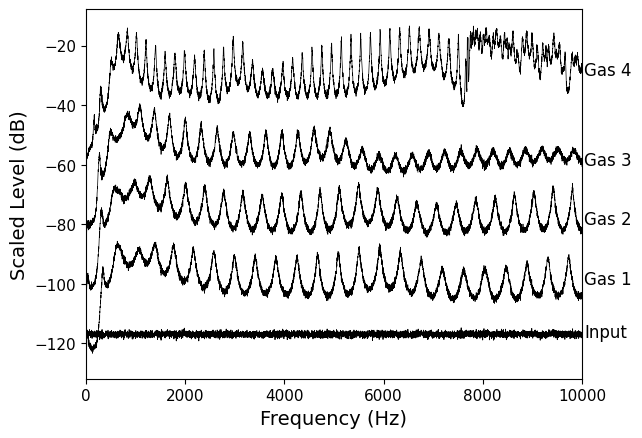

In [52]:
# Make a stacked plot of acoustic interferometry spectral data
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '11'

ax.plot(White_Noise_Spectrum['Frequency (Hz)'], White_Noise_Spectrum['Level (dB)']-70, linewidth=0.6, color = 'black', label = 'Noise')
ax.plot(Gas1_Spectrum['Frequency (Hz)'], Gas1_Spectrum['Level (dB)']-40, linewidth=0.5, color = 'black', label = 'Gas 1')
ax.plot(Gas2_Spectrum['Frequency (Hz)'], Gas2_Spectrum['Level (dB)']-20, linewidth=0.5, color = 'black', label = 'Gas 2')
ax.plot(Gas3_Spectrum['Frequency (Hz)'], Gas3_Spectrum['Level (dB)'], linewidth=0.5, color = 'black', label = 'Gas 3')
ax.plot(Gas4_Spectrum['Frequency (Hz)'], Gas4_Spectrum['Level (dB)']+30, linewidth=0.5, color = 'black', label = 'Gas 4')

# Plot x and y axis min/max limits for plot
plt.xlim(0, 10000)
#plt.ylim(0, 15000000)

#plt.title("$^1$H NMR of Cannabidiol (CBD)")
plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("Scaled Level (dB)", fontsize=14)

# plot legend and axes
#ax.legend(loc = 'upper left', fontsize=9)
#ax.get_yaxis().set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

# Annotate Plot with text
ax.text(10050, -30, 'Gas 4', fontsize=12)
ax.text(10050, -60, 'Gas 3', fontsize=12)
ax.text(10050, -80, 'Gas 2', fontsize=12)
ax.text(10050, -100, 'Gas 1', fontsize=12)
ax.text(10050, -118, 'Input', fontsize=12)

# Display the Plot
plt.show()

## Use the Python SciPy Library to Find Peaks in the Spectral Data

The python [scipy](https://docs.scipy.org/doc/scipy/index.html) library has a [signals](https://docs.scipy.org/doc/scipy/reference/signal.html) component with a [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function that makes determining the resonance frequencies more automated and convenient.

In [53]:
# python code using SciPy library for extracting resonance 'peak' locations in acoustic interferometry spectral data

gas1_peaks = find_peaks(Gas1_Spectrum['Level (dB)'], rel_height=5, distance = 200, prominence = 0.10)
gas1_peaks

Gas1_Frequency = Gas1_Spectrum['Frequency (Hz)']
gas1_peak_list = Gas1_Frequency[gas1_peaks[0]]
gas1_peak_list

print('Peak location Frequency (Hz)')
print('')
print(round(gas1_peak_list,2))

gas1_peak_array = np.array((round(gas1_peak_list,2)))
#gas1_peak_array

gas1_peaktable = pd.DataFrame(gas1_peak_array)
#gas1_peaktable

Peak location Frequency (Hz)

23         32.30
253       341.84
469       632.54
806      1086.08
1046     1409.08
1310     1764.38
1612     2170.82
1917     2581.29
2227     2998.50
2535     3413.01
2843     3827.53
3165     4260.88
3465     4664.63
3777     5084.53
4093     5509.81
4396     5917.59
4712     6342.87
5021     6758.73
5337     7184.01
5653     7609.30
5962     8025.16
6284     8458.51
6608     8894.56
6921     9315.80
7235     9738.39
7541    10150.21
7857    10575.49
8165    10990.01
Name: Frequency (Hz), dtype: float64


### Plot the Spectral Data and Scipy find_peaks

Its easier to visualize the results of the resonance peak finding by plotting the spectral data and vertical dotted lines for each of the 'peaks' determined from the find_peak scipy function.  The plotting uses MatPlotLib again.

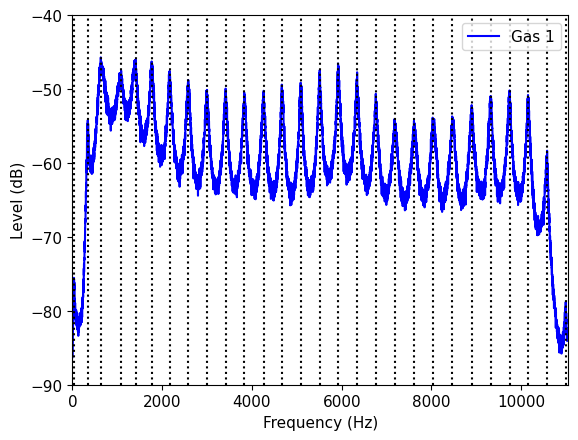

In [54]:
#initializes the figure
fig = plt.figure()

plt.plot(Gas1_Spectrum['Frequency (Hz)'], Gas1_Spectrum['Level (dB)'], 'b-', label = 'Gas 1')

#set the plotting axis limits and x- and y-axis labels
plt.axis([0,11050,-90,-40])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Level (dB)')

# For Loop to add the peak_list determined using SciPy find_peaks and add as verticle dotted lines to the spectrum plot
for y in range(len(gas1_peaks[0])):
  plt.axvline(x = gas1_peak_list.iloc[y], color='k',linestyle='dotted')

# Plot a legend and show the plot in this notebook
plt.legend()
plt.show()